# EDA CALTECH
We will create a MNIST Dataset in order to try it.

In [17]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(0,'../')
from src.classification import ClassificationCALTECH
caltech_path = "/mnt/c/BUSDATA/Datasets/CALTECH256/flat/"

cls_dataset = ClassificationCALTECH.from_folder(caltech_path,nmax_per_class=None)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


  0%|          | 0/257 [00:00<?, ?it/s, cls_name=airplanes-101]

100%|██████████| 257/257 [02:17<00:00,  1.87it/s, cls_name=zebra]                    


In [18]:
caltech_path = "/mnt/c/BUSDATA/Datasets/CALTECH256/caltech.json"
cls_dataset.save(caltech_path)

In [19]:
ndataset=ClassificationCALTECH.from_json(caltech_path)

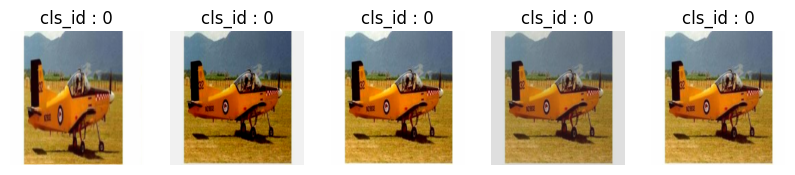

In [20]:
import matplotlib.pyplot as plt
n_img = 5
fig,ax = plt.subplots(1,n_img,figsize=(10,2))

for i in range(n_img):
    img,target,name = ndataset[2]

    img_np = (img.numpy().transpose(1,2,0)+1)*127.5
    ax[i].imshow(img_np)
    ax[i].set_title(f'cls_id : {target}')
    ax[i].axis('off')
plt.show()

We create our dataloader

In [3]:
from torch.utils.data import DataLoader
import os
train_loader = DataLoader(cls_dataset,batch_size=10,shuffle=True,num_workers=os.cpu_count())

In [4]:
batch = next(iter(train_loader))

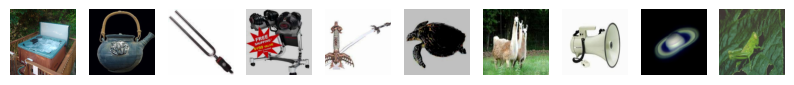

In [6]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,10,figsize=(10,1))
for i,img_torch in enumerate(batch[0]):
    # C,H,W => H,W,C
    np_img = (127.5*(img_torch.permute(1,2,0)+1)).numpy()
    ax[i].imshow(np_img)
    ax[i].set_axis_off()
plt.show()
